In [28]:
import pandas as pd
import numpy as np

from glob import glob
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
from PIL import Image

# Outline
1. Take a look at the data
2. Extract text from images
    - pytesseract
    - keras_ocr
    - easyocr
3. Compare results

In [29]:
img = glob('../TCG-RECOGNITION/data/*')
img

['../TCG-RECOGNITION/data\\1.jpg',
 '../TCG-RECOGNITION/data\\175.jpg',
 '../TCG-RECOGNITION/data\\1_.jpg',
 '../TCG-RECOGNITION/data\\3.jpg']

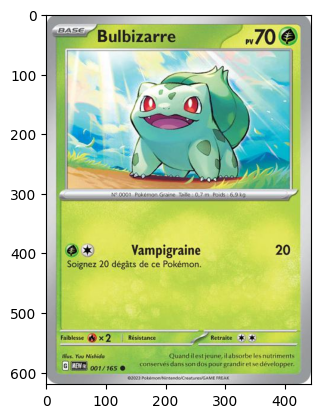

In [30]:
plt.imshow(plt.imread(img[0]))

## Pytesseract

In [31]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd='C:\\Program Files\\Tesseract-OCR\\tesseract.exe'
print(pytesseract.image_to_string(img[0], lang='fra'))

Bulbizarre dé "70@

Vampigraine
Soignez 20 dégâts de ce Pokémon.

Fiblese D x2 | Rébune PACE

us. You Nishida Guandilestieune, ilabsorbe les nutriments:
(COLE oo1/165 enr dans todo pourgranairetse développer




## EasyOCR

In [32]:
import easyocr

reader = easyocr.Reader(['fr'], gpu = False)

Using CPU. Note: This module is much faster with a GPU.


In [34]:
results = reader.readtext(img[0])
pd.DataFrame(results)

,0,1,2
0,"[[19, 21], [67, 21], [67, 35], [19, 35]]",BASE,0.555370
1,"[[82, 22], [222, 22], [222, 54], [82, 54]]",Bulbizarre,0.954903
2,"[[329, 21], [391, 21], [391, 57], [329, 57]]",Pv70,0.857162
3,"[[122, 298], [144, 298], [144, 306], [122, 306]]",Quo,0.343625
4,"[[148, 298], [216, 298], [216, 306], [148, 306]]",Fokemon Grain :,0.123923
5,"[[220, 298], [242, 298], [242, 306], [220, 306]]",allke,0.177960
6,"[[247, 297], [303, 297], [303, 309], [247, 309]]","0,7m Foids",0.624793
7,"[[308, 298], [334, 298], [334, 306], [308, 306]]",6oko,0.048884
8,"[[140, 382], [264, 382], [264, 414], [140, 414]]",Vampigraine,0.982333
9,"[[382, 382], [414, 382], [414, 410], [382, 410]]",20,0.999736


## Keras_ocr

In [36]:
import keras_ocr
pipeline = keras_ocr.pipeline.Pipeline()

Looking for C:\Users\clara\.keras-ocr\craft_mlt_25k.h5
Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.
Looking for C:\Users\clara\.keras-ocr\crnn_kurapan.h5


In [40]:
results = pipeline.recognize([img[0]])
pd.DataFrame(results[0], columns=['text', 'bbox'])

2/2 [==============================] - 1s 476ms/step


,text,bbox
0,bass,"[[19.0, 22.0], [65.0, 22.0], [65.0, 33.0], [19..."
1,70,"[[348.0, 23.0], [387.0, 23.0], [387.0, 53.0], ..."
2,bulbizarre,"[[85.0, 25.0], [219.0, 25.0], [219.0, 50.0], [..."
3,pv,"[[333.0, 41.0], [349.0, 41.0], [349.0, 53.0], ..."
4,ocon,"[[121.0, 297.0], [144.0, 297.0], [144.0, 307.0..."
5,graine,"[[188.0, 297.0], [218.0, 297.0], [218.0, 307.0..."
6,otm,"[[248.0, 297.0], [274.0, 297.0], [274.0, 307.0..."
7,ggka,"[[307.0, 297.0], [335.0, 297.0], [335.0, 307.0..."
8,n,"[[109.0, 299.0], [119.0, 299.0], [119.0, 306.0..."
9,polemon,"[[147.0, 298.0], [188.0, 298.0], [188.0, 307.0..."


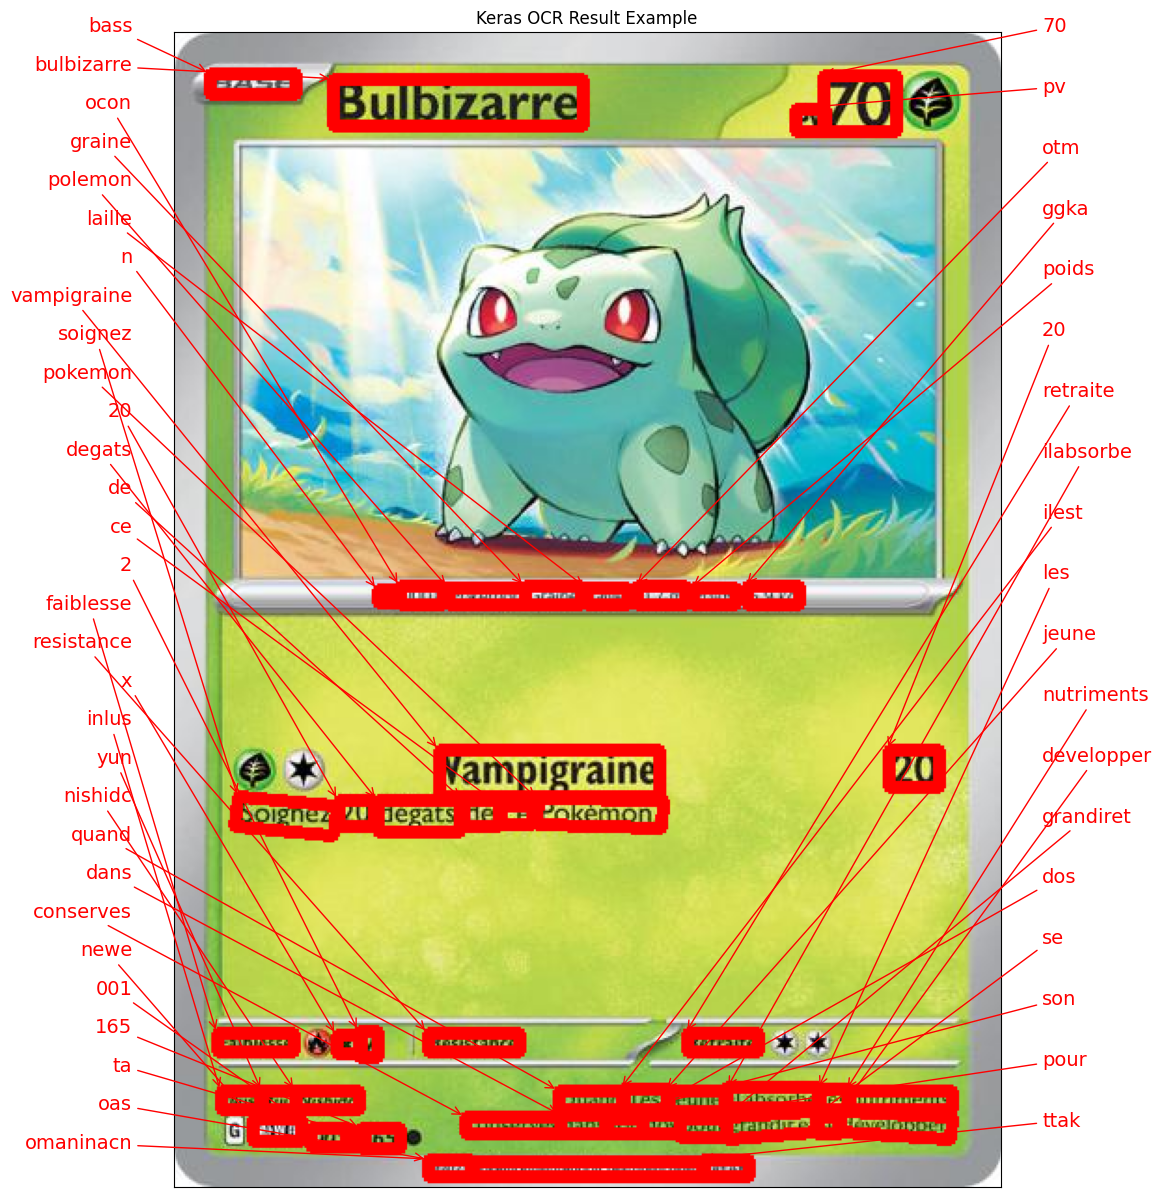

In [56]:
fig, ax = plt.subplots(figsize=(15, 15))
keras_ocr.tools.drawAnnotations(plt.imread(img[0]), results[0], ax=ax)
ax.set_title('Keras OCR Result Example')
plt.show()